# Taylor Cina D214 Performance Assessment

## Task 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

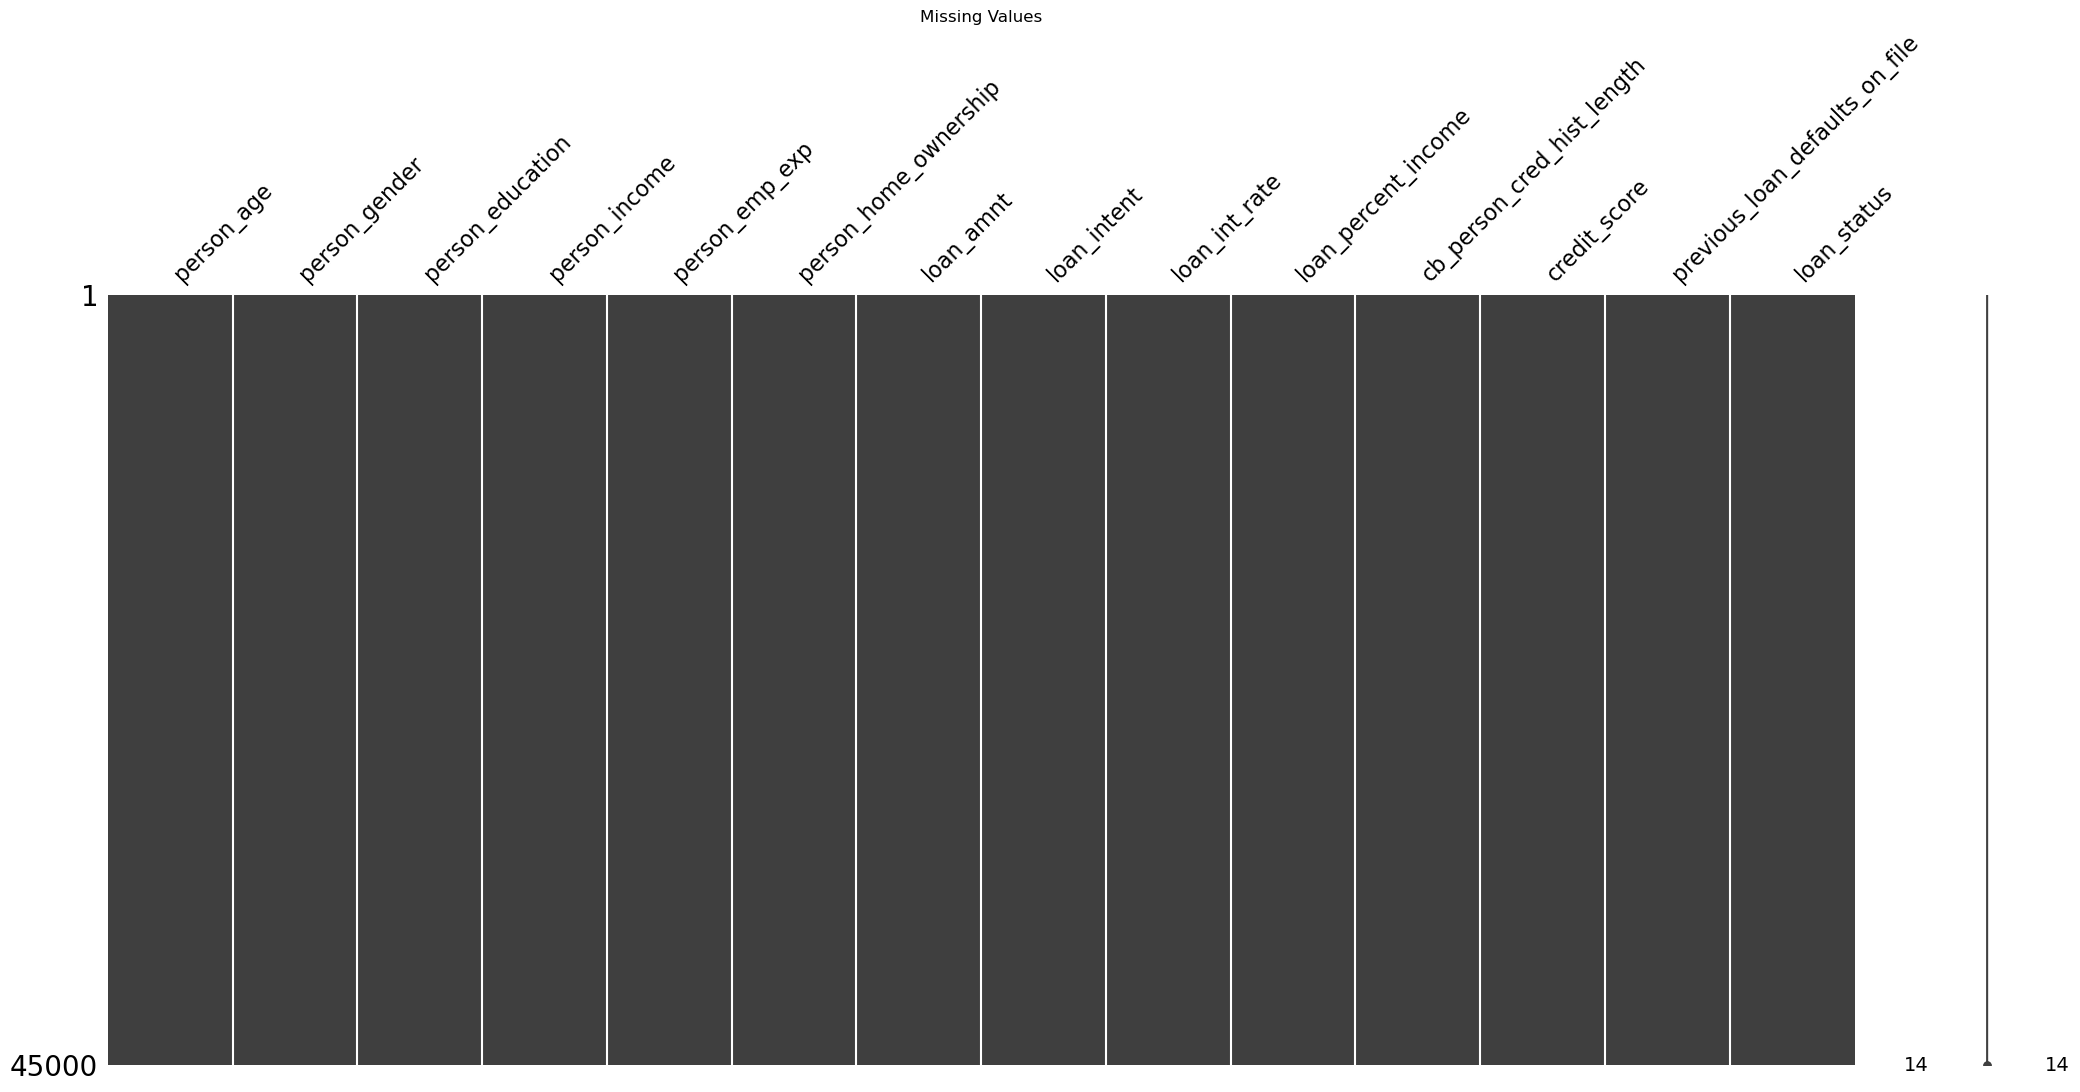

Complete duplicates:
False    45000
Name: count, dtype: int64 



In [20]:
import numpy as np
import pandas as pd
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

pd.set_option('display.max_columns', None)

csv = pd.read_csv("loan_data.csv", keep_default_na=False)

#basic info
print(csv.info(), "\n")
print(csv.describe(), "\n")

#Detect missing values
csv.replace([np.inf, -np.inf], np.nan, inplace=True)
msno.matrix(csv)
plt.title("Missing Values")
plt.show()

#Detecting duplicate values
print("Complete duplicates:")
print(csv.duplicated().value_counts(), "\n")

Unique values in person_gender ['female' 'male']
Percent distribution in person_gender
male      55.202222
female    44.797778
Name: count, dtype: float64 

Unique values in person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Percent distribution in person_education
Bachelor       29.775556
Associate      26.728889
High School    26.604444
Master         15.511111
Doctorate       1.380000
Name: count, dtype: float64 

Unique values in person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Percent distribution in person_home_ownership
RENT        52.095556
MORTGAGE    41.086667
OWN          6.557778
OTHER        0.260000
Name: count, dtype: float64 

Unique values in loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Percent distribution in loan_intent
EDUCATION            20.340000
MEDICAL              18.995556
VENTURE              17.375556
PERSONAL             16.782222
DEBTCONSOLIDATION    15.877778
HOMEIMPROVEM

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


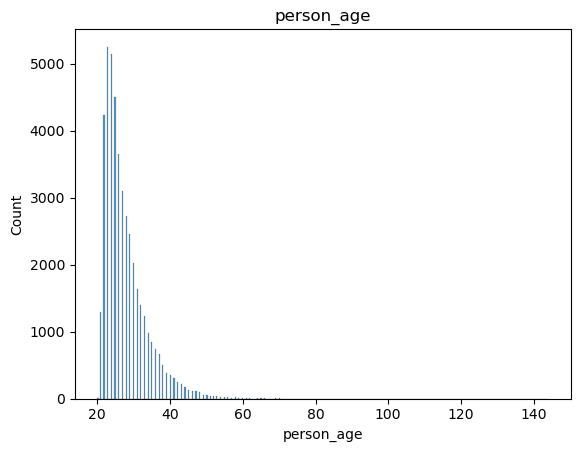

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


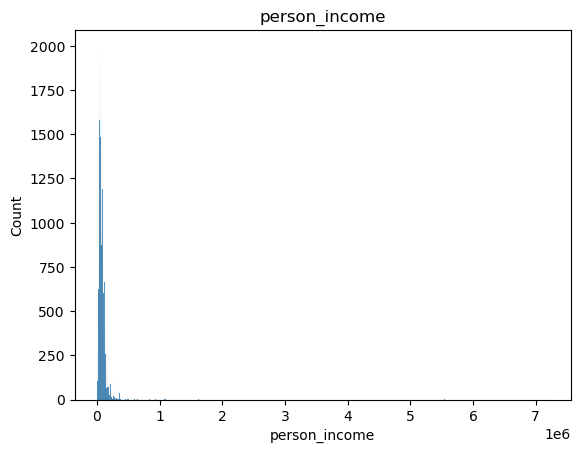

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


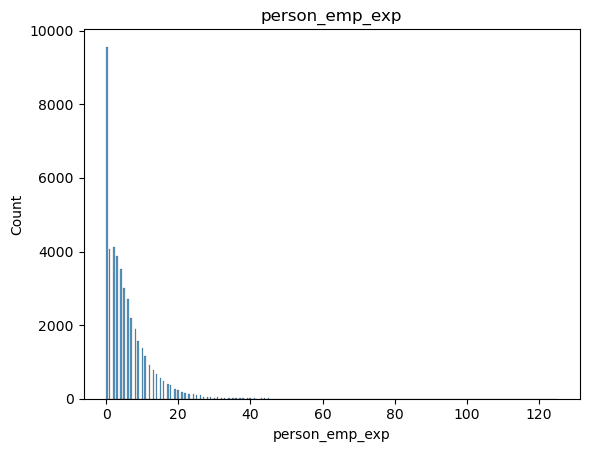

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


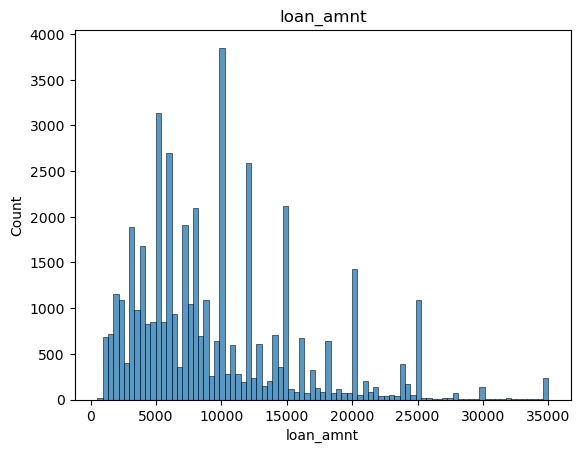

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


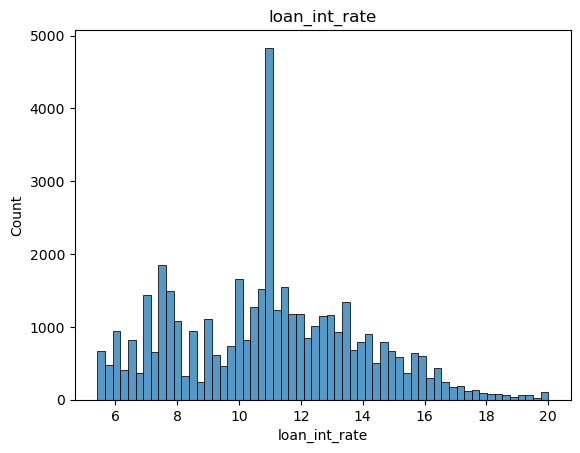

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


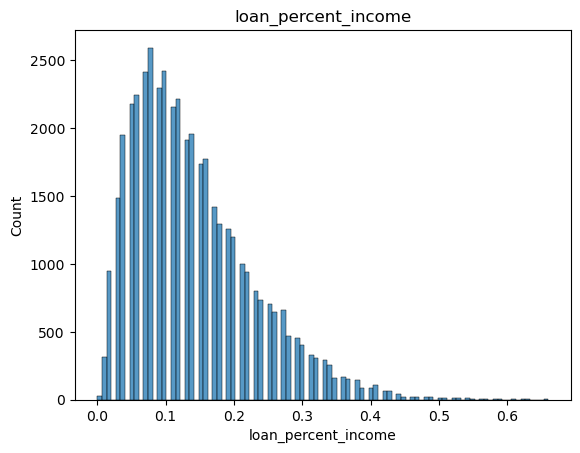

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


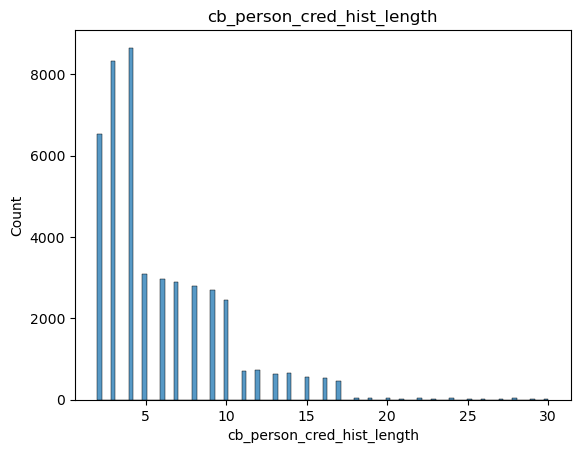

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


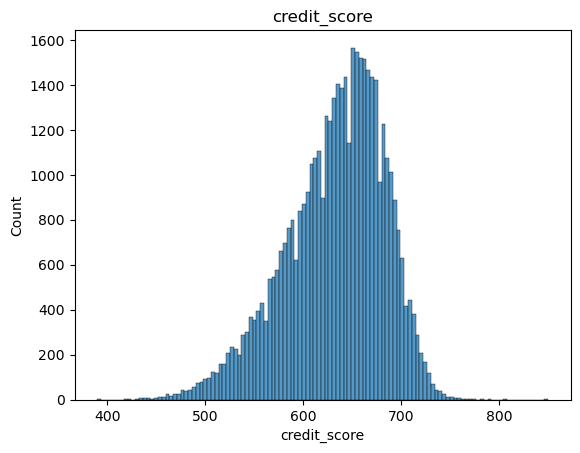

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


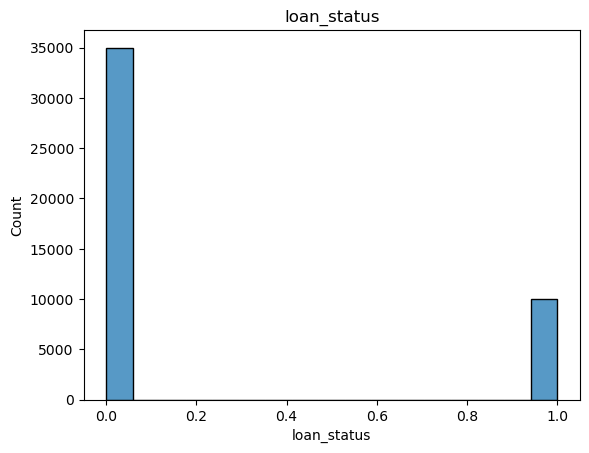

In [21]:
#Variable visualizations
#this takes two and a half minutes to run
# g = sns.pairplot(csv, hue='loan_status')
# plt.show()

#categorical column value distributions
for col in csv.select_dtypes(include="object"):
    print("Unique values in", col, csv[col].unique())
    total = csv[col].count()
    print("Percent distribution in", csv[col].value_counts() / total * 100, '\n')

for col in csv.select_dtypes(exclude='object'):
    sns.histplot(csv[col])
    plt.title(col)
    plt.show()

In [22]:
#Preprocessing

#binary categorical variables
csv['previous_loan_defaults_on_file'] = csv['previous_loan_defaults_on_file'].map({'No' : 0, 'Yes' : 1}).astype('bool')
csv['loan_status'] = csv['loan_status'].map({0 : False, 1 : True}).astype('bool')

#ordinal categorical variables
csv['person_education'] = csv['person_education'].map({'High School' : 0, 'Associate' : 1, 'Bachelor' : 2, 'Master' : 3, 'Doctorate' : 4})

#one-hot categorical variables
for col in ['person_gender', 'person_home_ownership', 'loan_intent']:
    csv = pd.concat([csv, pd.get_dummies(csv[col], prefix=col)], axis=1)

csv = csv.drop(['person_gender', 'person_home_ownership', 'loan_intent'], axis=1)

csv.head(5)

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_female,person_gender_male,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,False,True,True,False,False,False,False,True,False,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,True,False,True,False,False,False,True,False,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,True,True,False,True,False,False,False,False,False,False,True,False,False
3,23.0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,False,True,True,False,False,False,False,True,False,False,False,True,False,False
4,24.0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,False,True,False,True,False,False,False,True,False,False,False,True,False,False


In [23]:
#split data
X = csv.drop(['loan_status'], axis=1)
y = csv['loan_status']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

Confusion Matrix: 
 [[10437    63]
 [ 1333  1667]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.89      0.99      0.94     10500
        True       0.96      0.56      0.70      3000

    accuracy                           0.90     13500
   macro avg       0.93      0.77      0.82     13500
weighted avg       0.90      0.90      0.89     13500
 

Area Under Curve Score: 
 0.9568421587301585


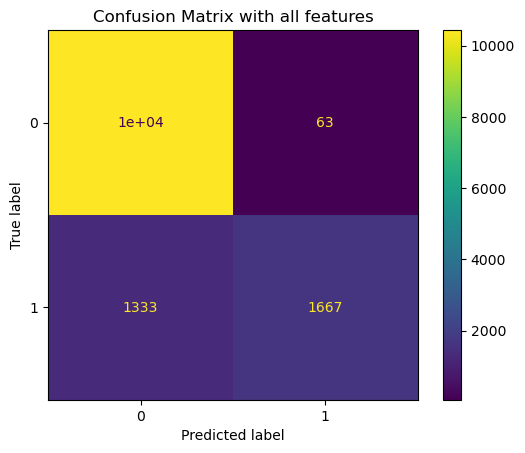

In [24]:
#model training

param_dist = {
    'max_depth': stats.randint(1, 5),
    'n_estimators': stats.randint(300, 500),
    'min_samples_leaf': stats.randint(1, 10)
}

#hyperparameter tuning
# model = RandomForestClassifier(random_state=seed)
# randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=3, scoring='f1_micro', n_jobs=-1)
# randomCV.fit(X_train, y_train)
# print(randomCV.best_estimator_)
# y_pred = randomCV.predict(X_test)
# all features, max_depth=4, min_samples_leaf=4, n_estimators=318

model = RandomForestClassifier(n_estimators = 318, max_depth = 4, min_samples_leaf = 4, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred), "\n")
print("Area Under Curve Score: \n", roc_auc_score(y_test, y_probas))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix with all features")
plt.show()

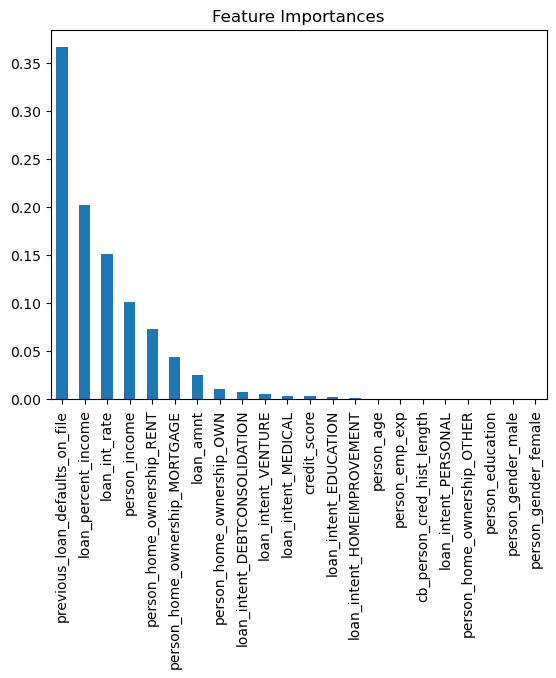

In [25]:
#feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.title("Feature Importances")
plt.show()

In [26]:
#round 2, split data based on feature importances
X = csv.loc[:, ['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income', 'person_home_ownership_RENT']]
y = csv['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

Confusion Matrix: 
 [[10160   340]
 [  881  2119]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.97      0.94     10500
        True       0.86      0.71      0.78      3000

    accuracy                           0.91     13500
   macro avg       0.89      0.84      0.86     13500
weighted avg       0.91      0.91      0.91     13500
 

Area Under Curve Score: 
 0.9568209206349207


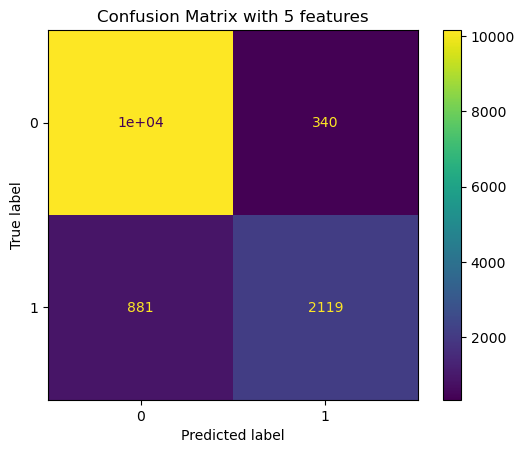

In [28]:
#model training

param_dist = {
    'max_depth': stats.randint(1, 5),
    'n_estimators': stats.randint(300, 500),
    'min_samples_leaf': stats.randint(1, 10)
}

#hyperparameter tuning
# model = RandomForestClassifier(random_state=seed)
# randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, scoring='f1_micro', cv=3, n_jobs=-1)
# randomCV.fit(X_train, y_train)
# print(randomCV.best_estimator_)
# y_pred = randomCV.predict(X_test)
# top 4 features, max_depth=4, min_samples_leaf=5, n_estimators=450
# top 5 features, max_depth=4, min_samples_leaf=7, n_estimators=330
# top 6 features, max_depth=4, min_samples_leaf=6, n_estimators=317

model = RandomForestClassifier(n_estimators = 330, max_depth = 4, min_samples_leaf = 7, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred), "\n")
print("Area Under Curve Score: \n", roc_auc_score(y_test, y_probas))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix with 5 features")
plt.show()